# Visualization in Python - Case Study

There are many python packages for visualization. We'll focus on capabilities available through pandas, and to a lesser extent, matplotlib. There is great documentation on all of this.
The case study is to analyze the flow of bicycles out of stations in the Pronto trip data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# The following ensures that the plots are in the notebook
%matplotlib inline
# We'll also use capabilities in numpy
import numpy as np

In [2]:
df = pd.read_csv("2015_trip_data.csv")
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


Now let's consider the popularity of the stations.

In [4]:
from_counts = pd.value_counts(df.from_station_id)
to_counts = pd.value_counts(df.to_station_id)

What kind of objects are returned from pd.value_counts? Are these plottable?

In [6]:
from_counts

WF-01          6742
BT-01          5885
CBD-13         5385
CH-07          5190
SLU-15         5006
CH-08          4879
CH-02          4790
SLU-01         4451
BT-03          4199
CH-05          3777
SLU-19         3765
SLU-07         3728
SLU-16         3513
BT-05          3368
SLU-02         3275
CH-01          3235
WF-04          3161
CH-03          3161
SLU-04         3022
CBD-06         3010
SLU-17         3009
CBD-03         2974
CH-09          2926
CBD-05         2897
CH-15          2839
PS-04          2811
EL-03          2662
SLU-18         2569
CH-12          2563
DPD-01         2556
BT-04          2221
FH-01          2025
EL-05          1967
PS-05          1911
UD-04          1904
EL-01          1901
FH-04          1863
CBD-07         1838
UD-01          1767
CH-06          1670
ID-04          1464
UW-04          1373
UW-06          1372
UD-07          1286
UW-02          1085
SLU-20          987
UW-07           874
UW-10           841
DPD-03          835
CBD-04          690


Our initial task is comparison - which stations are most popular. A bar plot seems appropriate. We can plot this using pandas.

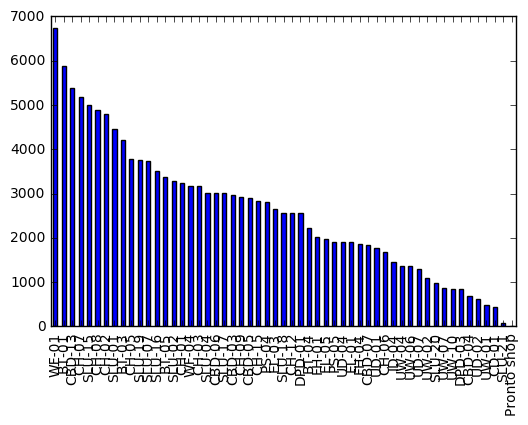

In [7]:
from_counts.plot.bar()

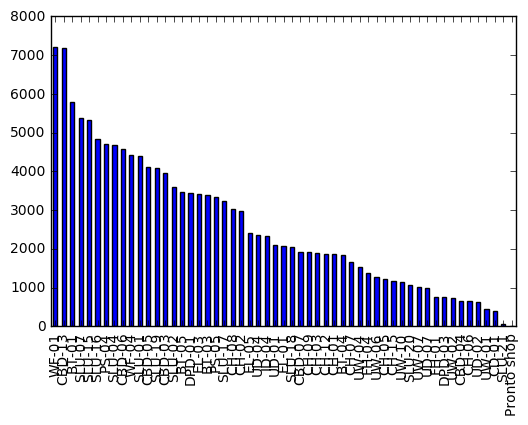

In [8]:
to_counts.plot.bar()

We want if there is a general movement of bikes from one station to another. That is, are from and to counts out of balance. This is a comparison task. One approach is to combine the two bar plots in the same figure.

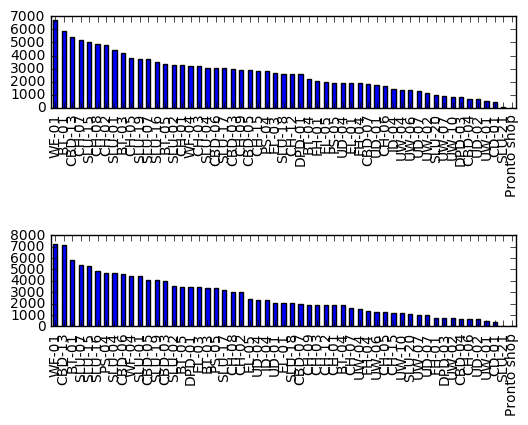

In [9]:
plt.subplot(3,1,1)
from_counts.plot.bar()
plt.subplot(3,1,3)
to_counts.plot.bar()
# Note the use of an empty second plot to provide space between the plots

But this is deceptive since the two plots have different x-axis. So, first we'll make sure that the counts are ordered consistently.
from_counts and to_counts are indexed by the station name. That is, to_counts['WF-01'] should have the value 7212.

In [10]:
# Script to put to_counts in the same order as from_counts
to_counts_list = []
for station in from_counts.index:
    to_counts_list.append(to_counts[station])

An even better way to do this is to use a python "comprehension". This is a way to simplify short scripts into a single statement. A comprehension can be a list or a dict.

In [11]:
to_counts_list = [to_counts[station] for station in from_counts.index]
#ordered_to_counts = pd.Series(count_list, index=from_counts.index)

Now that we have from_counts and to_counts_list ordered with the same index, let's bundle this into a new dataframe.

Dictionaries are represented by expressions within curly braces ({,}) and provide a kind of associative memory.

In [16]:
a_dict = {'a': 1}
a_dict['a']
a_dict['a'] = 2
a_dict['b'] = [1,2,3]

In [17]:
a_dict

{'a': 2, 'b': [1, 2, 3]}

In [19]:
b_dict = {'from': from_counts.values, 'to': to_counts_list}

In [21]:
df_counts = pd.DataFrame({'from': from_counts.values, 'to': to_counts_list}, index=from_counts.index)
df_counts.head()

,from,to
WF-01,6742,7212
BT-01,5885,5800
CBD-13,5385,7189
CH-07,5190,1657
SLU-15,5006,5328


In [22]:
df_counts.index

Index([u'WF-01', u'BT-01', u'CBD-13', u'CH-07', u'SLU-15', u'CH-08', u'CH-02',
       u'SLU-01', u'BT-03', u'CH-05', u'SLU-19', u'SLU-07', u'SLU-16',
       u'BT-05', u'SLU-02', u'CH-01', u'WF-04', u'CH-03', u'SLU-04', u'CBD-06',
       u'SLU-17', u'CBD-03', u'CH-09', u'CBD-05', u'CH-15', u'PS-04', u'EL-03',
       u'SLU-18', u'CH-12', u'DPD-01', u'BT-04', u'FH-01', u'EL-05', u'PS-05',
       u'UD-04', u'EL-01', u'FH-04', u'CBD-07', u'UD-01', u'CH-06', u'ID-04',
       u'UW-04', u'UW-06', u'UD-07', u'UW-02', u'SLU-20', u'UW-07', u'UW-10',
       u'DPD-03', u'CBD-04', u'UD-02', u'UW-01', u'CD-01', u'SLU-21',
       u'Pronto shop'],
      dtype='object')

Let's do the plots for df_counts dataframe and compare where there are differences.

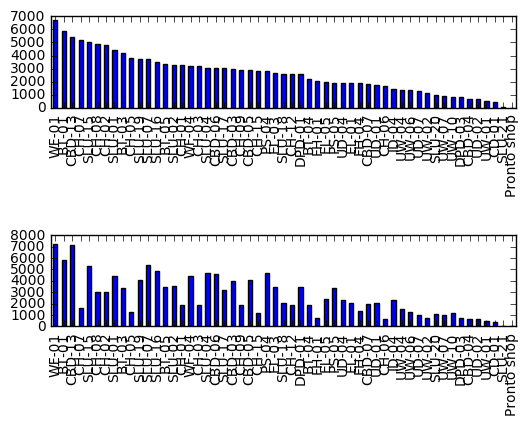

In [13]:
plt.subplot(3,1,1)
df_counts['from'].plot.bar()
plt.subplot(3,1,3)
df_counts['to'].plot.bar()

This is really awkward to find the differences since we must move our eyes between the two plots. A better approach is to look at a single variable - outflow. This is the "from" counts minus the "to" counts. We'll define a new dataframe.

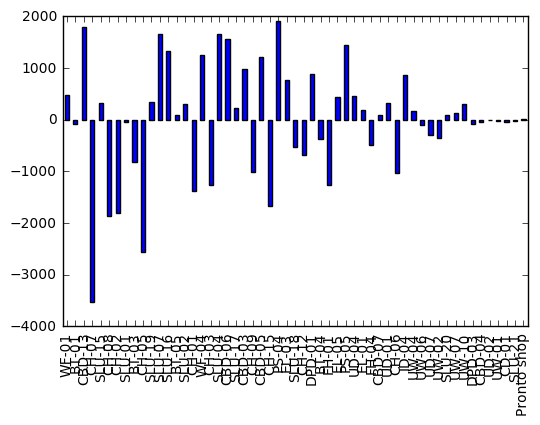

In [14]:
df_outflow = pd.DataFrame({'outflow':df_counts['to'] - df_counts['from']}, index=df_counts.index)
df_outflow.plot.bar(legend=False)

We can make this readable by only looking at stations with large outflows, either positive or negative.

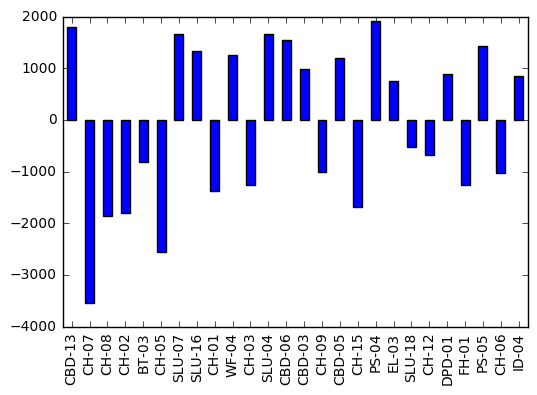

In [23]:
min_flow = 500
sel = abs(df_outflow.outflow) > min_flow
df_outflow_small = df_outflow[sel]
df_outflow_small.plot.bar(legend=False)

## In-class exercise
- Using the pronto data, explore comparisons & trends in # rides by time of day, day of week, station, month, membership, gender
- What idioms work best for the different kinds of trends

Work in teams of three
- One person in the team will give a 2 minute summary at end of class